# Max infection peak vs $\beta$ for different system size

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import os
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

plt.style.use("../config/custom_plots.mplstyle")

```yaml
nAgents: 10000
nSteps: 100
nSaveSteps: 1
nRuns: 5
networkP: 0.8
networkM: 10
additionalLinksFraction: 0.01
virtualLayer: true
epidemicLayer: true
comorbidities: false
qVoterParameters:
  p: 0.2
  q: 6
epidemicLayerParameters:
  beta: 0.1
  zeta: 0.0
  alpha: 0.0
  gamma: 0.5
  mu: 0.9
  kappa: 0.1
maxInfectedTimeMean: 10
maxInfectedTimeStd: 5
positiveOpinionFraction: 0.9
proPisFraction: 0.0
pisVaccinationCorrelation: 0.0
infectedFraction: 0.1
fractionIllnessA: 0.0
fractionIllnessB: 0.0
outputFolder: simulations/max_infection_peak_vs_beta_low_beta
firstParameterRange:
  start: 0.0
  end: 0.5
  count: 51
  vals: null
  type: beta
secondParameterRange:
  start: 0
  end: 0
  count: 0
  vals: [1000, 10000, 30000]
  type: N
thirdParameterRange: null
#  start: 0
#  end: 0
#  count: 0
#  vals: [0.01, 0.05, 0.1, 0.3, 0.5]
#  type: p
linksRemoval: false
nQVoterPerStep: 1
vaccinationFraction: 0.0
neglectNeighboursPiS: false
```

In [2]:
def load_df(prefix, beta, folder, p, nagents, fracPos=1.0, q=6, qvotersteps=1, nsteps=100, nruns=10):
    dfs = []
    for n in range(nruns):
        path = f"../simulations/{folder}/{prefix}_NAGENTS={nagents}_NSTEPS={nsteps}_NETWORKP=0.8_FRAC_LINKS=0.01_FRAC_POS_OPINION={fracPos}_FRAC_INFECTED=0.1_QVOTER=p={p}_q={q}_PIS=0.0_EPIDEMIC=beta={beta}_zeta=0,00_alpha=0,00_gamma=0,50_mu=0,90_kappa=0,10_QVOTERSTEPS={qvotersteps}_NRUN={n}.tsv"
        path = path.replace(',', '.')
        
        df = pd.read_csv(path, sep="\t")
        dfs.append(df)
    dfs1 = pd.DataFrame(np.array([x.to_numpy() for x in dfs]).mean(axis=0),
                        index=df.index, 
                        columns=df.columns)
    columns = [f'{s}Std' for s in df.columns]
    dfs1Std = pd.DataFrame(np.array([x.to_numpy() for x in dfs]).std(axis=0),
                        index=df.index, 
                        columns=columns)
    dfs1Std['step'] = dfs1['step']
    dfs1 = dfs1.merge(dfs1Std, on='step')
    return dfs1


betas = ['{:.2f}'.format(x / 100) for x in list(range(101))][:51]
betas_float = [float(b) for b in betas]
# betas = [b.replace('.', ',') for b in betas]

# ps = ['0.01', '0.02', '0.10', '0.30', '0.50']
# ps = ['0.01', '0.05', '0.10', '0.30', '0.50']
ps = ['0.01', '0.10', '0.50'] # consider only 3 p

# ps = ['0,01', '0,05', '0,10', '0,30', '0,50']

sizes = [1000, 10000, 30000]

print('ps: ', ps)
print('Betas: ', betas, len(betas))

ps:  ['0.01', '0.10', '0.50']
Betas:  ['0.00', '0.01', '0.02', '0.03', '0.04', '0.05', '0.06', '0.07', '0.08', '0.09', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19', '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28', '0.29', '0.30', '0.31', '0.32', '0.33', '0.34', '0.35', '0.36', '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.43', '0.44', '0.45', '0.46', '0.47', '0.48', '0.49', '0.50'] 51


In [3]:
def load_dfs(p, betas=betas, sizes=sizes, path='max_infection_peak_vs_beta_low_beta_nruns_10', prefix='off'):
    """
    { N: list of dataframes, one per `beta` value }
    
    e.g.

    {size: [pd.DataFrame(beta=0.00), pd.DataFrame(beta=0.01), ...]}
    """
    xs = {}
    for N in tqdm(sizes):
        xs_per_N = []
        for beta in betas:
            df1 = load_df(prefix, beta, path, p, N)
            xs_per_N.append(df1)
        xs[N] = xs_per_N
    return xs


def load_all_dfs(ps):
    """
    { qvoterstep: {beta: list of dataframes}, ... }
    """
    df_per_p = {}
    for p in ps:
        df_per_p[p] = load_dfs(p)
    return df_per_p 

In [4]:
def load_df_time(prefix, beta, folder, p, nagents, fracPos=1.0, q=6, qvotersteps=1, nsteps=100, nruns=10):
    dfs = []
    for n in range(nruns):
        path = f"../simulations/{folder}/{prefix}_NAGENTS={nagents}_NSTEPS={nsteps}_NETWORKP=0.8_FRAC_LINKS=0.01_FRAC_POS_OPINION={fracPos}_FRAC_INFECTED=0.1_QVOTER=p={p}_q={q}_PIS=0.0_EPIDEMIC=beta={beta}_zeta=0,00_alpha=0,00_gamma=0,50_mu=0,90_kappa=0,10_QVOTERSTEPS={qvotersteps}_NRUN={n}.tsv"
        path = path.replace(',', '.')        
        df = pd.read_csv(path, sep="\t")
        time_max = df[df['infectedRate'] == df['infectedRate'].max()].step.to_numpy()[0]
        dfs.append(time_max)
    return np.mean(dfs), np.std(dfs)


def load_dfs_time(p, betas=betas, sizes=sizes, path='max_infection_peak_vs_beta_low_beta_nruns_10', prefix='off'):
    """
    { N: list of dataframes, one per `beta` value }
    
    e.g.

    {size: [pd.DataFrame(beta=0.00), pd.DataFrame(beta=0.01), ...]}
    """
    xs = {}
    for N in tqdm(sizes):
        xs_per_N = []
        for beta in betas:
            df1 = load_df_time(prefix, beta, path, p, N)
            xs_per_N.append(df1)
        xs[N] = xs_per_N
    return xs


def load_all_dfs_time(ps):
    """
    { qvoterstep: {beta: list of dataframes}, ... }
    """
    df_per_p = {}
    for p in ps:
        df_per_p[p] = load_dfs_time(p)
    return df_per_p 

In [5]:
%%time


dfs_ps = load_all_dfs(ps)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

CPU times: user 6.31 s, sys: 87.8 ms, total: 6.39 s
Wall time: 6.91 s


In [6]:
dfs_ps_time = load_all_dfs_time(ps)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


# colors = ['red', 'green', 'blue', 'purple', 'brown']
colors = ['golden yellow', 'soft purple', 'red', 'true blue', 'grass']
colors = ['xkcd:' + c for c in colors]
# markers = ['o', 'v', '^', 'D', 's']
markers = ['o', 'X', 's']

def max_infection_rate(df):
    return df['infectedRate'].max()

def max_infection_rate_std(df, fun):
    return df['infectedRateStd'][df['infectedRate'] == fun(df)].values[0]

def max_quarantine_rate(df):
    return df['quarantinedRate'].max()

def last_opinion(df):
    return df['meanOpinion'].to_numpy()[-1]

def last_recovered_rate(df):
    return df['recoveredRate'].to_numpy()[-1]

def time_max_infection(df):
    return df[df['infectedRate'] == df['infectedRate'].max()].step.to_numpy()[0]

def time_max_infection_std(df):
    return df[df['infectedRate'] == df['infectedRate'].max()].step.to_numpy()[0]


def plot_max_infection_peak_vs_beta_per_beta(dfs, color, betas_float=betas_float, markers=markers, 
                                             fun=max_infection_rate):
    i = 0
    markers_legend = []
    for size, df in dfs.items():
        if size != 10000:
            continue
        peaks = [fun(x) for x in df]
#         peaks_std = [max_infection_rate_std(x, fun) for x in df]
#         plt.errorbar(betas_float, peaks, yerr=peaks_std, fmt='o', linewidth=1, color=color, 
#                      marker=markers[i], mfc='none', alpha=0.9, label=rf'$N={{{size}}}$')
        plt.scatter(betas_float, peaks, s=60, label=rf'$N={{{size}}}$', color=color, 
                    marker=markers[i], facecolors='none', alpha=0.9)
        plt.plot(betas_float, peaks, '-', linewidth=1, color=color, alpha=0.3)
        
        l = Line2D([0], [0], marker=markers[i], color='black', label=rf'$N={{{size}}}$',
                    markersize=12, mfc='none', linestyle='')
        markers_legend.append(l)
        i += 1
    
    plt.xlabel(r'$\beta$', fontsize=24)
    plt.ylabel(r'$I_{max}$', fontsize=24) # max infection rate
    return markers_legend
    
def plot_max_infection_peak_vs_beta_per_p(dfs_ps, fun=max_infection_rate, add_legend=True):
    i = 0
    
    patches = []
    markers_legend = None
    for p, dfs in dfs_ps.items():
        markers_legend = plot_max_infection_peak_vs_beta_per_beta(dfs, colors[i+2], fun=fun)
        
        patch = Patch(facecolor=colors[i+2], label=rf"$p={{{p.replace(',', '.')}}}$", capstyle='round')
#         patch = plt.Line2D([], [], colors[i+2], label=rf"$p={{{p.replace(',', '.')}}}$", marker="s")
        patches.append(patch)
        i += 1
        
    p_empty = Patch(facecolor='w', label='', alpha=0.0)
    
    legend_elements = [*markers_legend, *patches]
    if add_legend:
        plt.legend(handles=legend_elements, ncol=2, columnspacing=1.0, fontsize=18, handletextpad=0.5)
#         plt.legend(handles=legend_elements, ncol=1, columnspacing=0.5)

In [8]:
def plot_max_infection_peak_vs_beta_per_beta(dfs, color, p, i, betas_float=betas_float, markers=markers, 
                                             fun=max_infection_rate):
    markers_legend = []
    for size, df in dfs.items():
        if size != 10000:
            continue
        peaks = [fun(x) for x in df]
#         peaks_std = [max_infection_rate_std(x, fun) for x in df]
#         plt.errorbar(betas_float, peaks, yerr=peaks_std, fmt='o', linewidth=1, color=color, 
#                      marker=markers[i], mfc='none', alpha=0.9, label=rf'$N={{{size}}}$')
        plt.scatter(betas_float, peaks, s=80, label=rf"$p={{{p.replace(',', '.')}}}$", color=color, 
                    marker=markers[i], edgecolor='black', alpha=0.9)
        plt.plot(betas_float, peaks, '-', linewidth=1, color=color, alpha=0.6)
        
#         l = Line2D([0], [0], marker=markers[i], color='black', label=rf'$N={{{size}}}$',
#                     markersize=12, mfc='none', linestyle='')
#         markers_legend.append(l)
    
    plt.xlabel(r'$\beta$', fontsize=24)
    plt.ylabel(r'$I_{max}$', fontsize=24) # max infection rate
    return markers_legend
    
def plot_max_infection_peak_vs_beta_per_p(dfs_ps, fun=max_infection_rate, add_legend=True):
    i = 0
    
    patches = []
    markers_legend = None
    for p, dfs in dfs_ps.items():
        markers_legend = plot_max_infection_peak_vs_beta_per_beta(dfs, colors[i+2], fun=fun, p=p, i=i)
        
#         patch = Patch(facecolor=colors[i+2], label=rf"$p={{{p.replace(',', '.')}}}$", capstyle='round')
#         patch = plt.Line2D([], [], colors[i+2], label=rf"$p={{{p.replace(',', '.')}}}$", marker="s")
#         patches.append(patch)
        i += 1
        
#     p_empty = Patch(facecolor='w', label='', alpha=0.0)
    
#     legend_elements = [*markers_legend, *patches]
    if add_legend:
        plt.legend(fontsize=18, handletextpad=0.5)
#         plt.legend(handles=legend_elements, ncol=1, columnspacing=0.5)

In [9]:
def plot_max_time1(dfs, color, p, i, betas_float=betas_float, markers=markers):
    markers_legend = []
    for size, df in dfs.items():
        if size != 10000:
            continue
        
        time_mean = [x[0] for x in df]
        time_std = [x[1] for x in df]
        plt.errorbar(betas_float, time_mean, yerr=time_std, fmt='o', linewidth=1, color=color, 
                     marker=markers[i], mec='black', alpha=0.9, label=rf"$p={{{p.replace(',', '.')}}}$")
#         plt.scatter(betas_float, peaks, s=80, label=rf"$p={{{p.replace(',', '.')}}}$", color=color, 
#                     marker=markers[i], edgecolor='black', alpha=0.9)
        plt.plot(betas_float, time_mean, '-', linewidth=1, color=color, alpha=0.6)
        
#         l = Line2D([0], [0], marker=markers[i], color='black', label=rf'$N={{{size}}}$',
#                     markersize=12, mfc='none', linestyle='')
#         markers_legend.append(l)
    
    plt.xlabel(r'$\beta$', fontsize=24)
    plt.ylabel(r'$I_{max}$', fontsize=24) # max infection rate
    return markers_legend
    
def plot_max_time_all(dfs_ps, add_legend=True):
    i = 0
    
    patches = []
    markers_legend = None
    for p, dfs in dfs_ps.items():
        markers_legend = plot_max_time1(dfs, colors[i+2], p=p, i=i)
        
#         patch = Patch(facecolor=colors[i+2], label=rf"$p={{{p.replace(',', '.')}}}$", capstyle='round')
#         patch = plt.Line2D([], [], colors[i+2], label=rf"$p={{{p.replace(',', '.')}}}$", marker="s")
#         patches.append(patch)
        i += 1
        
#     p_empty = Patch(facecolor='w', label='', alpha=0.0)
    
#     legend_elements = [*markers_legend, *patches]
    if add_legend:
        plt.legend(fontsize=18, handletextpad=0.5)
#         plt.legend(handles=legend_elements, ncol=1, columnspacing=0.5)

## Fig. 1 from Google docs

(-0.01, 0.15)

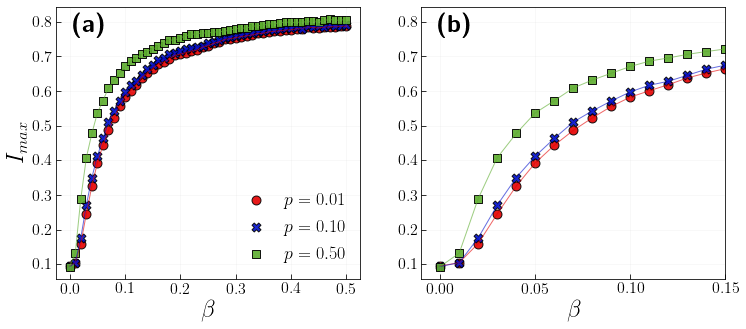

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_max_infection_peak_vs_beta_per_p(dfs_ps, fun=max_infection_rate)
plt.text(0.005, 0.77, r'\textbf{(a)}', fontsize=25)

plt.subplot(1, 2, 2)
plot_max_infection_peak_vs_beta_per_p(dfs_ps, fun=max_infection_rate, add_legend=False)
plt.ylabel('')
plt.text(-0.001, 0.77, r'\textbf{(b)}', fontsize=25)
plt.xlim(-0.01, 0.15)
# Maximum std = ~0.04 -> so I do not plot it not the graphs (error bars are smaller than symbols sizes)
# plt.savefig("../plots/paper/imax_vs_beta_no_size.pdf")

(-0.01, 0.15)

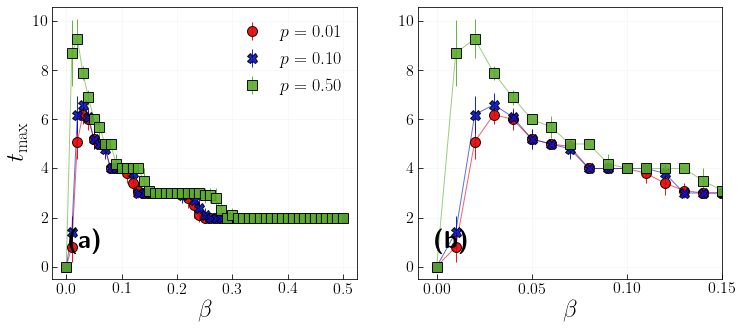

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_max_time_all(dfs_ps_time)
plt.ylabel(r'$t_{\mathrm{max}}$', fontsize=25)
plt.text(0.005, 0.77, r'\textbf{(a)}', fontsize=25)

plt.subplot(1, 2, 2)
plot_max_time_all(dfs_ps_time, add_legend=False)
plt.ylabel('')
plt.text(-0.001, 0.77, r'\textbf{(b)}', fontsize=25)
plt.xlim(-0.01, 0.15)


In [12]:
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plot_max_infection_peak_vs_beta_per_p(dfs_ps, fun=max_quarantine_rate)
# plt.ylabel(r'$Q_{max}$')

# plt.subplot(1, 2, 2)
# plot_max_infection_peak_vs_beta_per_p(dfs_ps, fun=max_quarantine_rate, add_legend=False)
# plt.xlim(-0.01, 0.1)
# plt.ylabel(r'$Q_{max}$')

## Fig. 1.1 from Google docs

Text(39, 0.7, '\\textbf{(b)}')

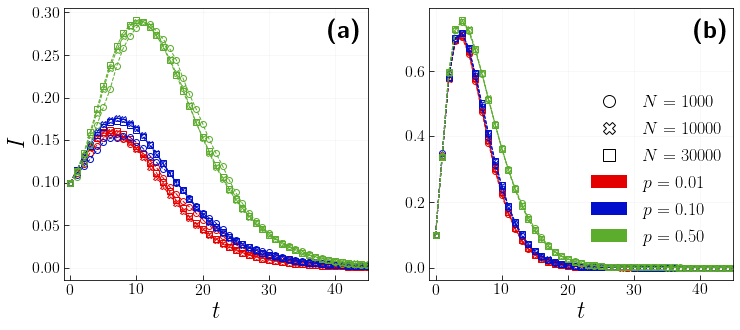

In [13]:
def plot_per_p(dfs_ps, beta, add_legend=False):
    i = 0
    markers_legend = None
    patches = []
    for p in ps:
        j = 0
        markers_legend = []
        for n in sizes:
            df = dfs_ps[p][n][betas.index(beta)]
            x = [0] + list(df.step + 1)
            y = [0.1] + list(df.infectedRate)
            plt.plot(x, y, 'o--', label=f'p={p}', linewidth=1, color=colors[i+2],
                     marker=markers[j], mfc='none', markersize=6)
            l = Line2D([0], [0], marker=markers[j], color='black', label=fr'$N={{{n}}}$',
                       markersize=12, mfc='none', linestyle='')
            markers_legend.append(l)
            j += 1
        patch = Patch(facecolor=colors[i+2], label=rf"$p={{{p.replace(',', '.')}}}$", capstyle='round')
        patches.append(patch)
        i += 1
    plt.ylabel(r'$I$', fontsize=24)
    plt.xlabel(r'$t$', fontsize=24)
    #plt.title(r'$\beta={}$'.format(beta.replace(',', '.')))
    plt.xlim(-1, 45)
    
    p_empty = Patch(facecolor='w', label='')
    legend_elements = [*markers_legend, *patches]
    if add_legend:
        plt.legend(handles=legend_elements, ncol=1, fontsize=18, loc=(0.51, 0.1))


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_per_p(dfs_ps, beta='0.02')
plt.text(39, 0.27, r'\textbf{(a)}', fontsize=25)

plt.subplot(1, 2, 2)
plot_per_p(dfs_ps, beta='0.20', add_legend=True)
plt.ylabel('')
plt.text(39, 0.7, r'\textbf{(b)}', fontsize=25)

# plt.savefig("../plots/paper/I_vs_t_for_p.pdf")